In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [18]:
listen_count = pd.read_csv("data/millionsong/train_triplets.txt.zip",
                          header=None, delimiter='\t')
'''
# 테이블은 사용자-곡-재생 카운트 세 값으로 돼 있다.
# 재생 카운트가 0이 아닌 것만 포함됐기 때문에
# 여기서는 재생 카운트 칼럼 전체를 1로 설정하면 된다.'''


'\n# 테이블은 사용자-곡-재생 카운트 세 값으로 돼 있다.\n# 재생 카운트가 0이 아닌 것만 포함됐기 때문에\n# 여기서는 재생 카운트 칼럼 전체를 1로 설정하면 된다.'

In [19]:
listen_count.shape

(48373586, 3)

In [20]:
listen_count

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
...,...,...,...
48373581,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUHHHH12AF729E4AF,2
48373582,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUJVIT12A8C1451C1,1
48373583,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUSMXX12AB0185C24,1
48373584,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOWYSKH12AF72A303A,3


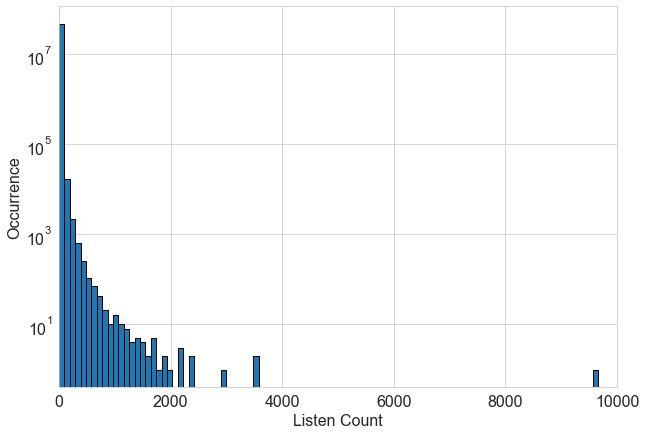

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

In [23]:
import json

biz_file = open('data/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

Text(0, 0.5, 'Occurrence')

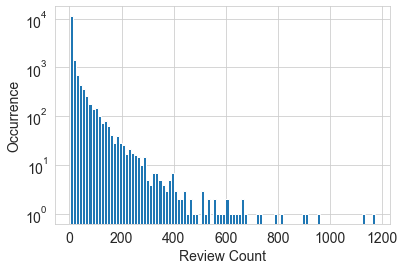

In [25]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [26]:
small_counts = np.random.randint(0, 100, 20)
small_counts

array([84, 12, 45, 56, 45, 16, 96, 52, 28, 43, 20, 70, 93, 88, 57, 50, 11,
       92, 98, 96])

In [28]:
np.floor_divide(small_counts, 10)

array([8, 1, 4, 5, 4, 1, 9, 5, 2, 4, 2, 7, 9, 8, 5, 5, 1, 9, 9, 9],
      dtype=int32)

In [29]:
large_counts = [296, 8286,64011,80,3,725,867,2215,7689,11495,91897,44,28,7971,926,122,22222]

In [30]:
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

In [36]:
# 10분위수
deciles = biz_df['review_count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])
deciles

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

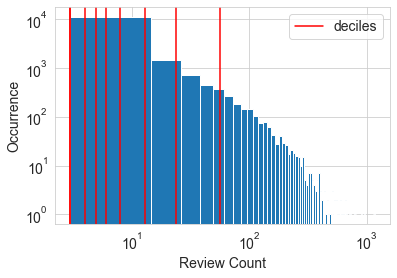

In [41]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [42]:
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3], dtype=int64)

In [45]:
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25,0.5,0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

In [56]:
# 리뷰 카운트에 대한 로그 변환
biz_df['log_review_count'] = np.log10(biz_df['review_count']+1)

Text(0, 0.5, 'Occurrence')

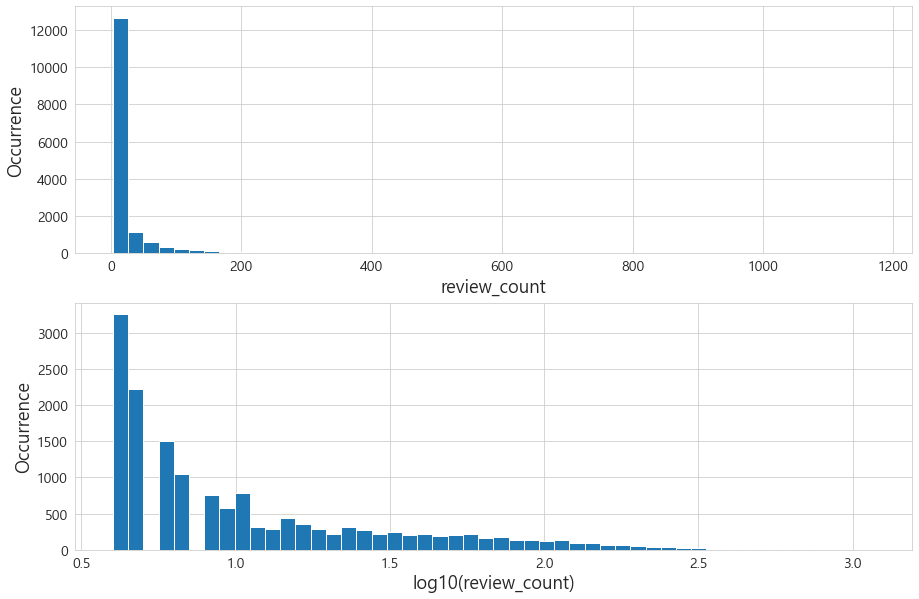

In [64]:
plt.rcParams["font.family"] = 'Malgun Gothic'  # 한글 지원 폰트 설정
plt.rcParams["font.size"] = 18               # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (15, 10)    # 그래프 사이즈 (가로,세로)inch
plt.rcParams["axes.unicode_minus"] = False   # 유니코드 뺄셈기호 표시 사용 안함(깨짐방지)

fig, (ax1, ax2) = plt.subplots(2,1)
biz_df['review_count'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count')
ax1.set_ylabel('Occurrence')

biz_df['log_review_count'].hist(ax=ax2, bins=50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count)')
ax2.set_ylabel('Occurrence')

In [81]:
news_df = pd.read_csv('data/OnlineNewsPopularity/OnlineNewsPopularity.csv', sep=', ', engine='python')   # warning 무시
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [83]:
news_df['log_n_tokens_content'] = np.log10(news_df['n_tokens_content'] + 1)

Text(0, 0.5, 'Number of Articles')

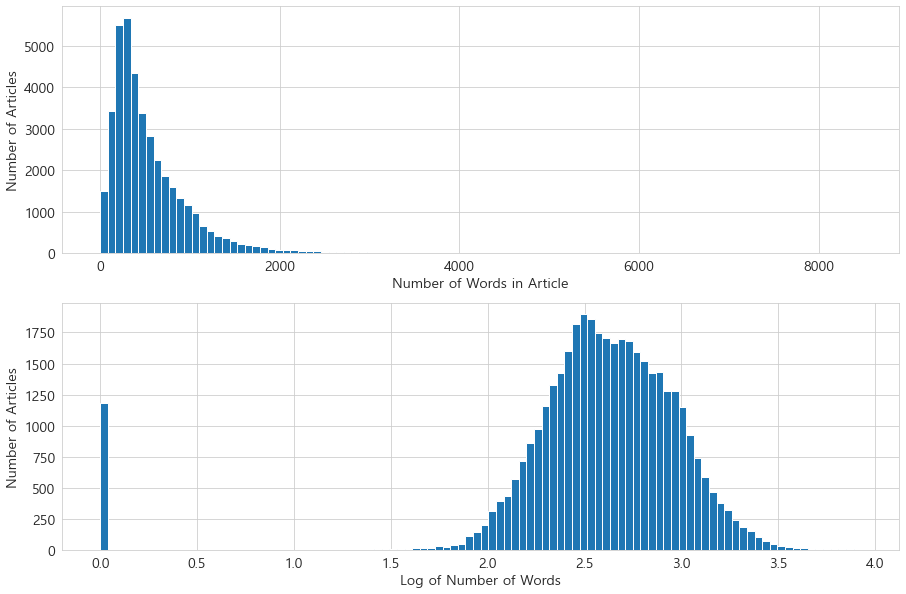

In [91]:
fig, (ax1, ax2) = plt.subplots(2,1)
news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

news_df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)